# fitting higher order polynominals

When a linear fit isn't enough

Assume you have some data that just doesn't look like a straight line.

I'll use some GM stock prices

In [60]:
GM <- read.csv("data/GM.csv")

In [61]:
head(GM,4)

Date,Open,High,Low,Close,Adj.Close,Volume
2012-10-15,24.90,25.72,24.55,24.59,21.05618,26219100
2012-10-22,24.56,24.85,23.19,23.28,19.93444,43517400
2012-10-29,24.30,25.99,23.90,25.79,22.08373,49176700
2012-11-05,25.44,26.27,24.38,25.04,21.44151,42563700


Just plot the Low

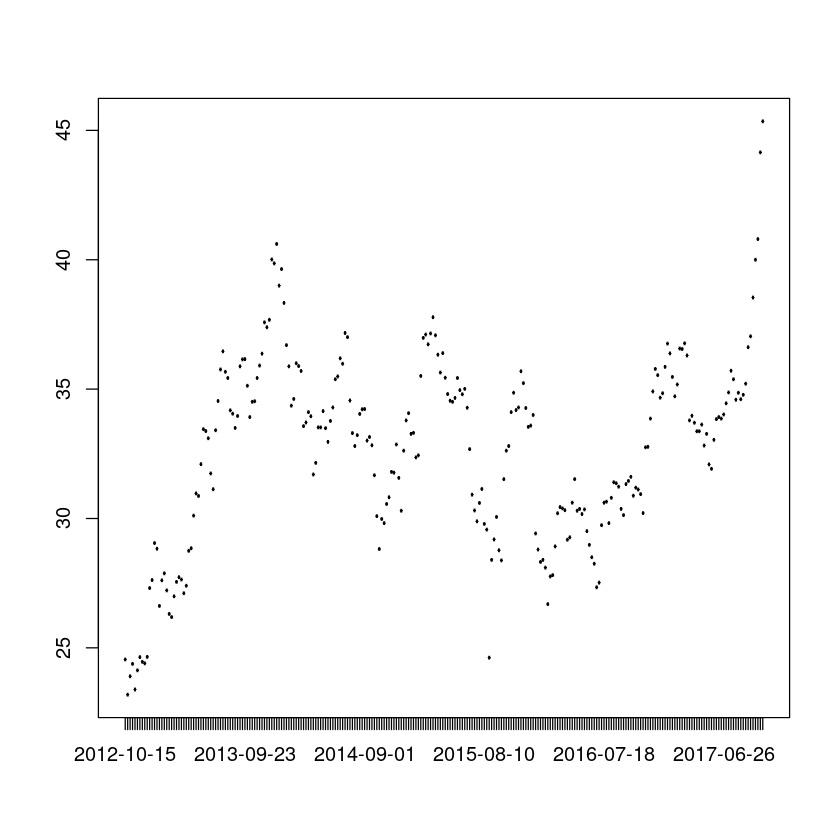

In [62]:
plot(GM$Date,GM$Low,type="l")

Fit a straight line

In [63]:
model_straight <- lm(Low ~ Date ,GM)

In [64]:
summary(model_straight)


Call:
lm(formula = Low ~ Date, data = GM)

Residuals:
ALL 262 residuals are 0: no residual degrees of freedom!

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)       24.55         NA      NA       NA
Date2012-10-22    -1.36         NA      NA       NA
Date2012-10-29    -0.65         NA      NA       NA
Date2012-11-05    -0.17         NA      NA       NA
Date2012-11-12    -1.16         NA      NA       NA
Date2012-11-19    -0.42         NA      NA       NA
Date2012-11-26     0.09         NA      NA       NA
Date2012-12-03    -0.09         NA      NA       NA
Date2012-12-10    -0.15         NA      NA       NA
Date2012-12-17     0.10         NA      NA       NA
Date2012-12-24     2.76         NA      NA       NA
Date2012-12-31     3.07         NA      NA       NA
Date2013-01-07     4.50         NA      NA       NA
Date2013-01-14     4.28         NA      NA       NA
Date2013-01-21     2.07         NA      NA       NA
Date2013-01-28     3.06         NA      N

It doesn't like dates... Need to play with these

In [65]:
class(GM$Date)

[1] "factor"

In [66]:
class(as.numeric(as.character(GM$Date)))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] "numeric"

It can't automatically convert dates. There are many packages to convert dates. I'll try a simple thing first using as.Date

In [67]:
class(as.Date(as.character(GM[3,1])))

[1] "Date"

In [68]:
GM$Date <- as.Date(as.character(GM$Date))

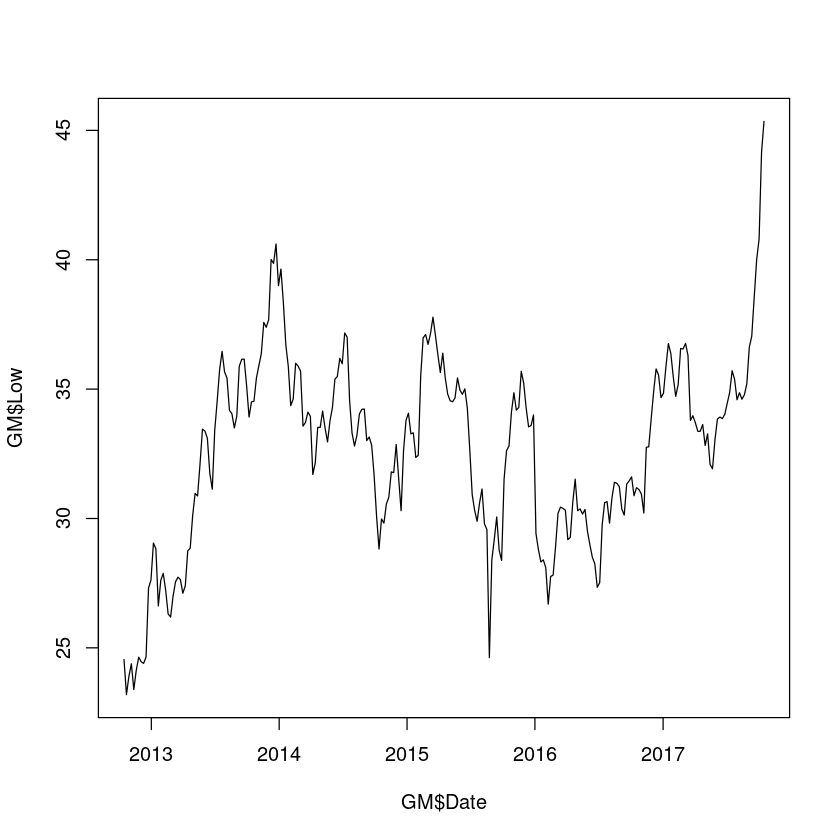

In [69]:
plot(GM$Date,GM$Low,type="l")

In [70]:
model_straight <- lm( Low ~ Date,GM )

In [71]:
summary(model_straight)


Call:
lm(formula = Low ~ Date, data = GM)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2846 -2.8104  0.4218  2.3157 11.0470 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.1697662  6.8394152   0.463    0.643    
Date        0.0017836  0.0004133   4.316 2.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.541 on 260 degrees of freedom
Multiple R-squared:  0.06686,	Adjusted R-squared:  0.06327 
F-statistic: 18.63 on 1 and 260 DF,  p-value: 2.26e-05


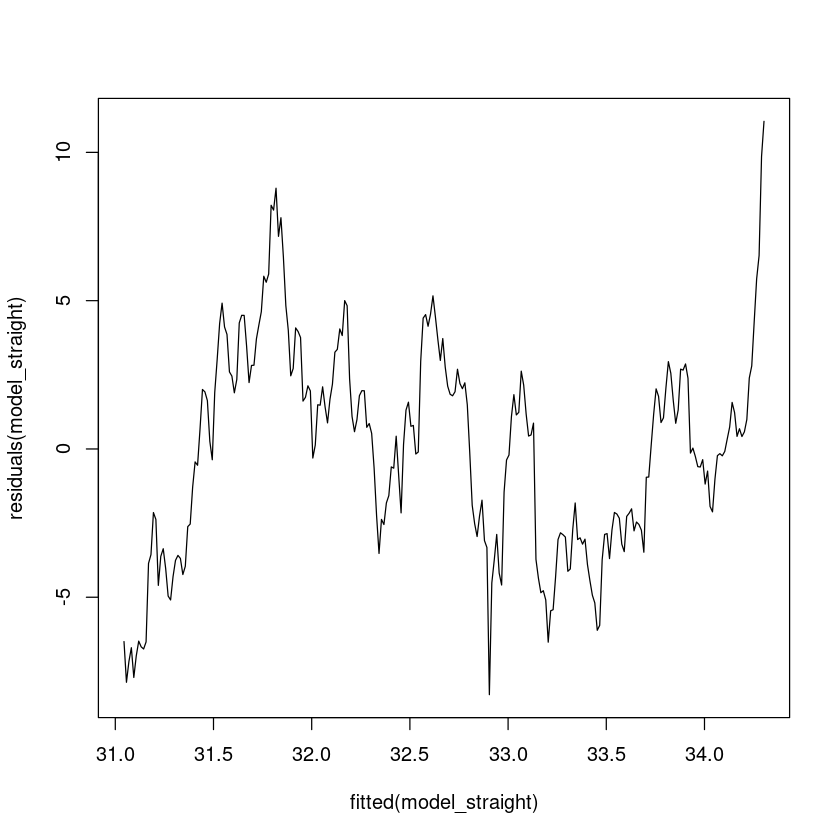

In [72]:
#residuals(model_straight)
plot(fitted(model_straight),residuals(model_straight),type="l")

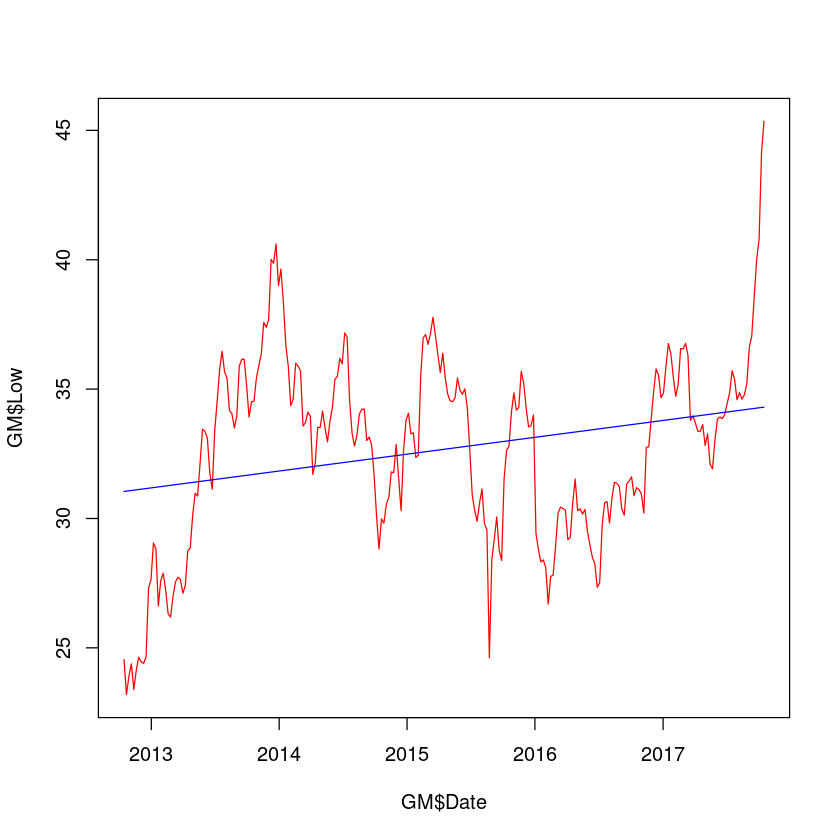

In [73]:
plot(GM$Date,GM$Low,col="Red",type="l")
lines(GM$Date,fitted(model_straight),col="Blue",type="l")

Not a great fit, It finds a line that runs through the data, but there is a large amount of difference throughout the graph. This function does not fit a linear model.

The next approach is to try a higher order equation. One with v^powers.


Call:
lm(formula = Low ~ poly(Date, 3), data = GM)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2835 -1.7077 -0.1988  1.7907  5.7345 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.6737     0.1439 227.072  < 2e-16 ***
poly(Date, 3)1  15.2848     2.3291   6.563 2.88e-10 ***
poly(Date, 3)2  -6.5650     2.3291  -2.819   0.0052 ** 
poly(Date, 3)3  42.6402     2.3291  18.308  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.329 on 258 degrees of freedom
Multiple R-squared:  0.5995,	Adjusted R-squared:  0.5948 
F-statistic: 128.7 on 3 and 258 DF,  p-value: < 2.2e-16



Call:
lm(formula = Low ~ poly(Date, 3), data = GM)

Coefficients:
   (Intercept)  poly(Date, 3)1  poly(Date, 3)2  poly(Date, 3)3  
        32.674          15.285          -6.565          42.640  


(Intercept) poly(Date, 3)1 poly(Date, 3)2 poly(Date, 3)3 
     32.673664      15.284833      -6.564954      42.640228

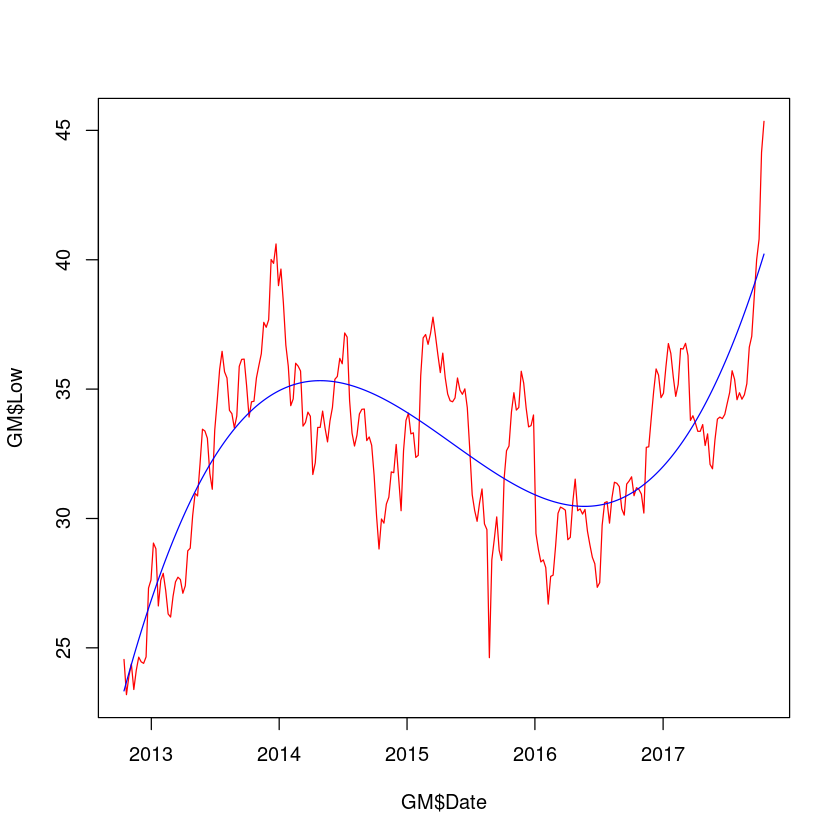

In [74]:
#GM$Date <- as.numeric(GM$Date)
model_poly <- lm(Low ~ poly(Date,3),GM)
summary(model_poly)
plot(GM$Date,GM$Low,col="Red",type="l")
lines(GM$Date,fitted(model_poly),col="blue",type="l")
model_poly
model_poly$coefficients

In [75]:
library(splines)

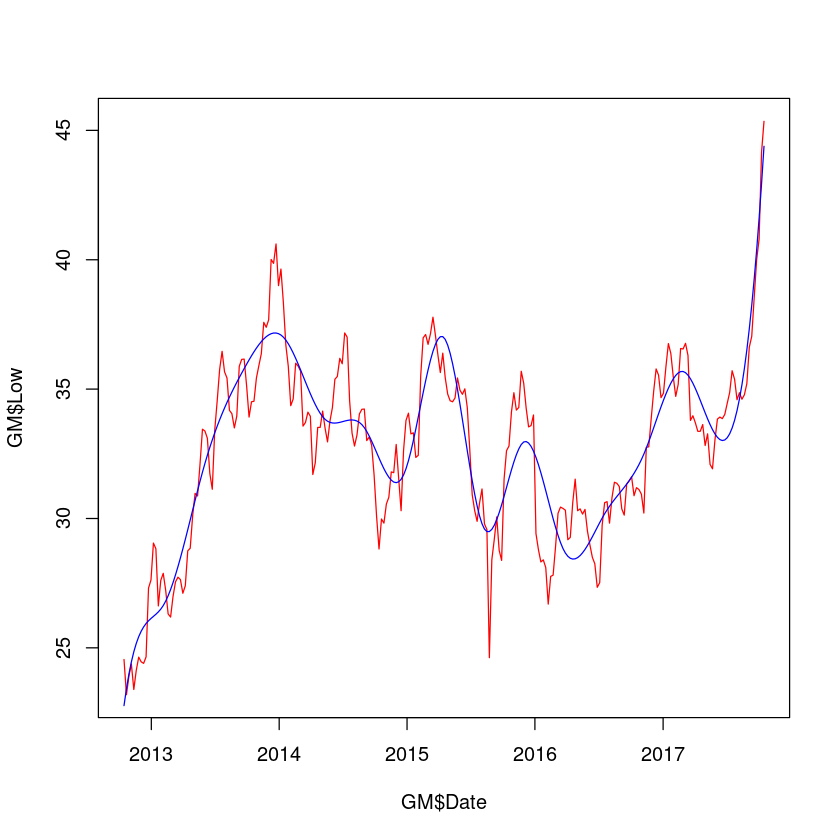

In [76]:
model_bs <- lm(Low ~ bs(Date,df=18),GM)
plot(GM$Date,GM$Low,col="red",type="l")
lines(GM$Date,fitted(model_bs),col="Blue",type="l")
#summary(model_bs)

In [77]:
GM3 <- GM[GM$Date<as.Date("2015-12-31"),]

In [78]:
tail(GM3,4)

,Date,Open,High,Low,Close,Adj.Close,Volume
165,2015-12-07,36.46,36.52,34.27,34.55,31.58586,59959100
166,2015-12-14,34.78,35.27,33.54,33.67,30.78136,76161100
167,2015-12-21,33.79,34.94,33.59,34.60,31.96473,33886500
168,2015-12-28,34.53,34.69,34.00,34.01,31.41967,23078200


In [79]:
GMP <- GM[GM$Date > as.Date("2015-12-30"),]

In [80]:
tail(GMP,4)

,Date,Open,High,Low,Close,Adj.Close,Volume
259,2017-09-25,40.19,40.69,40.00,40.38,40.38,64117300
260,2017-10-02,41.01,45.17,40.80,44.93,44.93,116020400
261,2017-10-09,45.03,46.11,44.15,45.88,45.88,67912700
262,2017-10-16,45.77,45.86,45.35,45.76,45.76,8830600


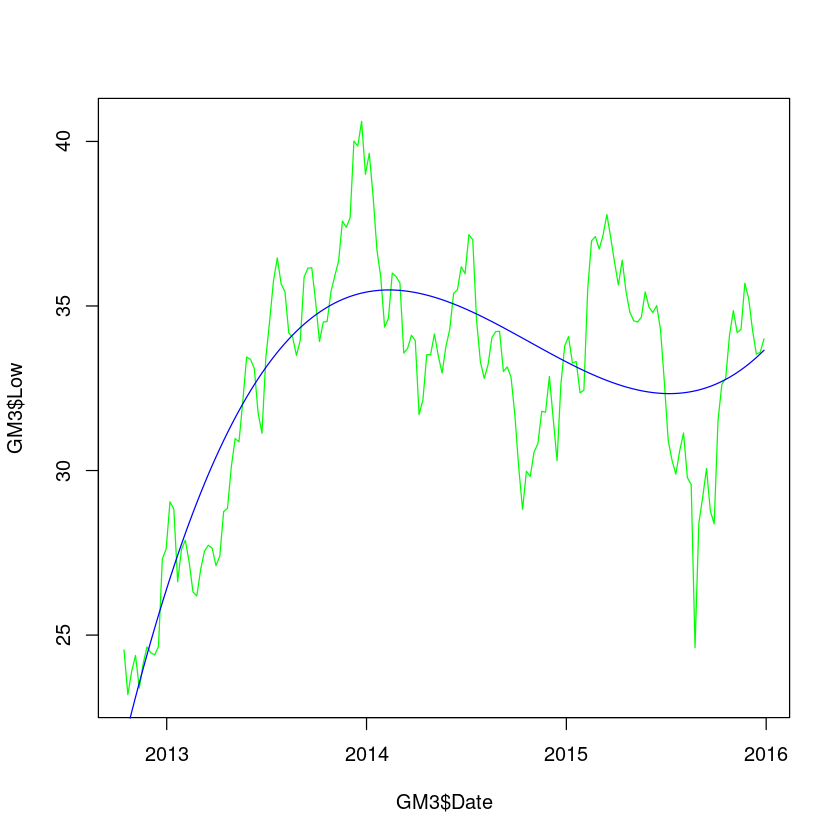

In [81]:
joel_model <- lm(Low ~ poly(Date,3),GM3)
plot(GM3$Date,GM3$Low,col="green",type="l")
lines(GM3$Date,fitted(joel_model),col="blue",type="l")


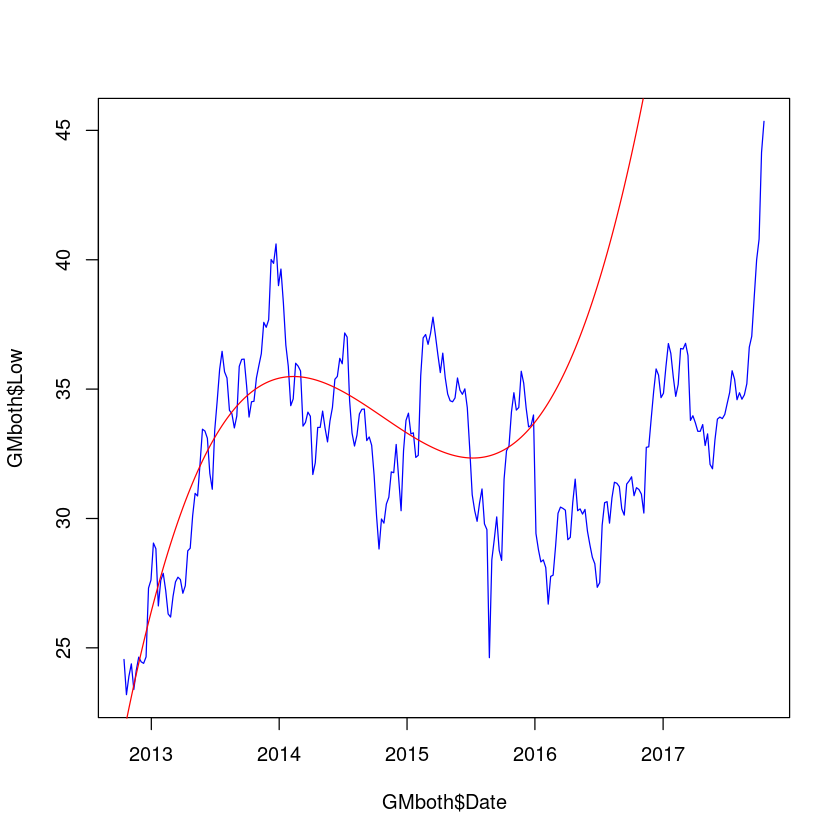

In [82]:
GMboth <- rbind(GM3,GMP)
plot(GMboth$Date,GMboth$Low,col="blue",type="l")
lines(GMboth$Date,predict(joel_model,GMboth),col="Red",type="l")


In [83]:
bob <- function(deg) {
    joel_model <- lm(Low ~ poly(Date,deg),GM3)
    plot(GMboth$Date,GMboth$Low,col="blue",type="l")
    lines(GMboth$Date,predict(joel_model,GMboth),col="Red",type="l")
    err <- sum(abs(GMP$Low-predict(joel_model,GMP)))
    err
}

[1] 1760.955

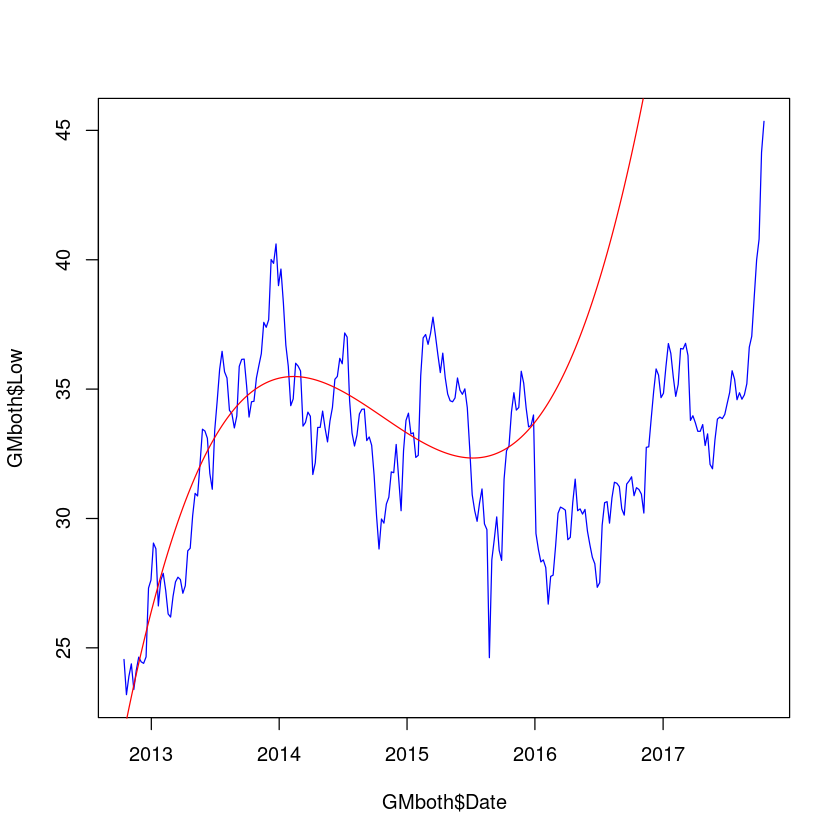

In [84]:
bob(3)

In [85]:
ebob <- function(deg) {
    joel_model <- lm(Low ~ poly(Date,deg),GM3)
    err <- sum(abs(GMP$Low-predict(joel_model,GMP)))
    err
}

In [86]:
lapply(1:10,ebob)

[[1]]
[1] 374.1967

[[2]]
[1] 1254.554

[[3]]
[1] 1760.955

[[4]]
[1] 1533.448

[[5]]
[1] 7971.544

[[6]]
[1] 65639.93

[[7]]
[1] 269203.1

[[8]]
[1] 27983.68

[[9]]
[1] 1614110

[[10]]
[1] 10200092

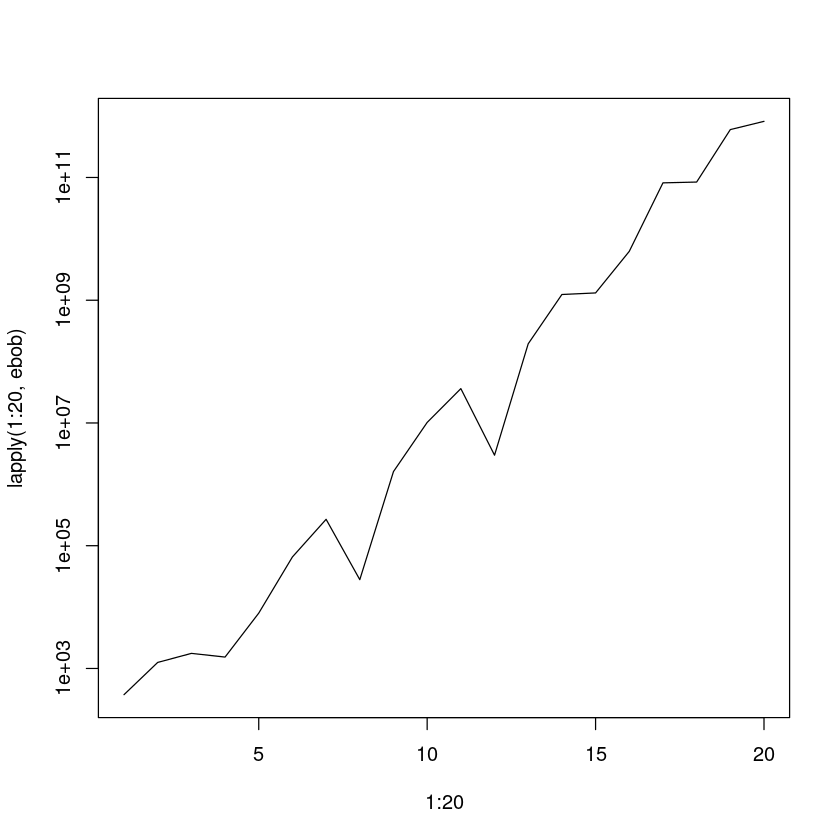

In [87]:
plot(1:20,lapply(1:20,ebob),type="l",log="y")

[1] 821246288186

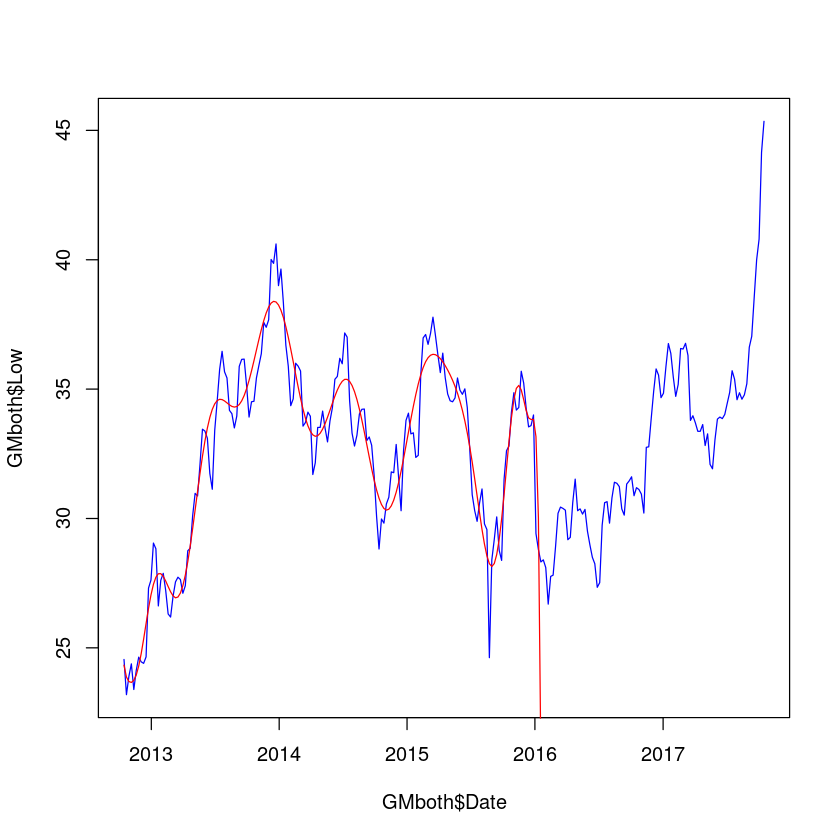

In [88]:
bob(20)

[1] 374.1967

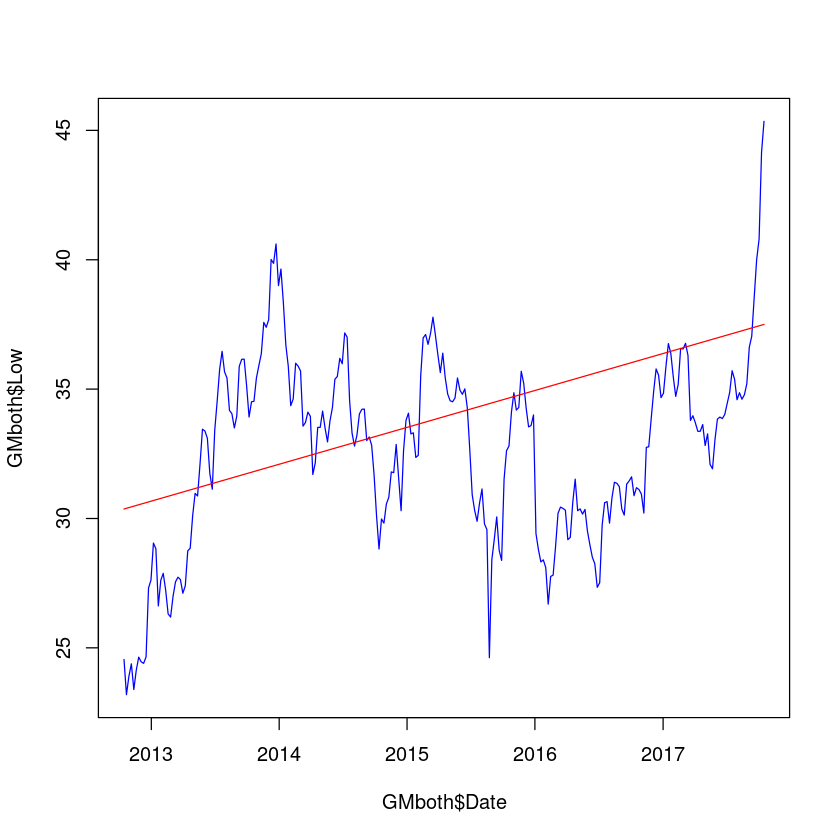

In [89]:
bob(1)

[1] 7971.544

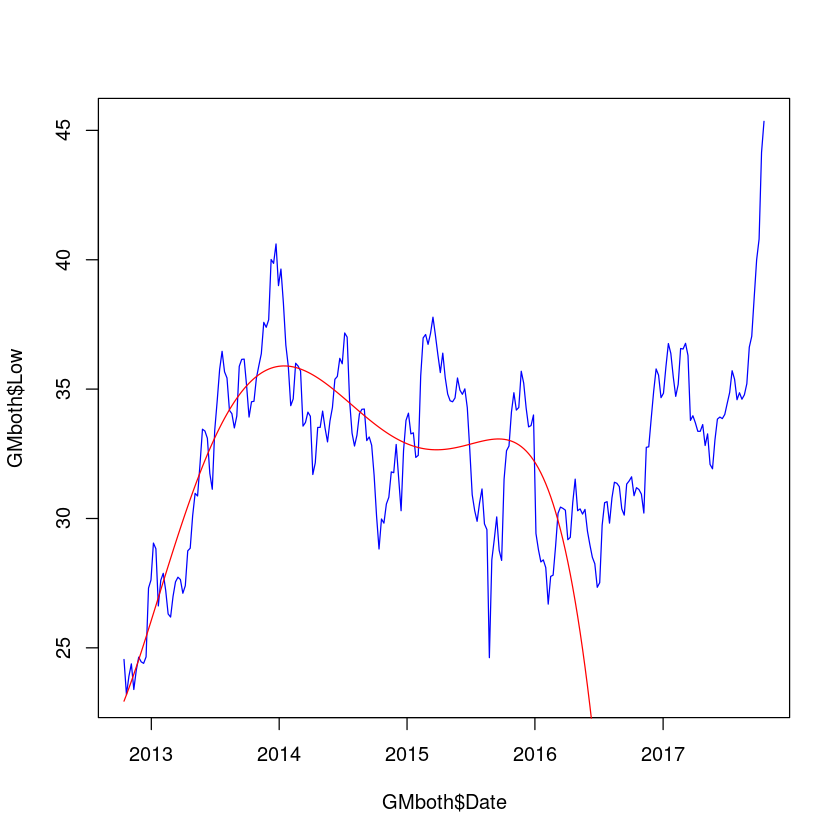

In [90]:
bob(5)

In [91]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 38.53456


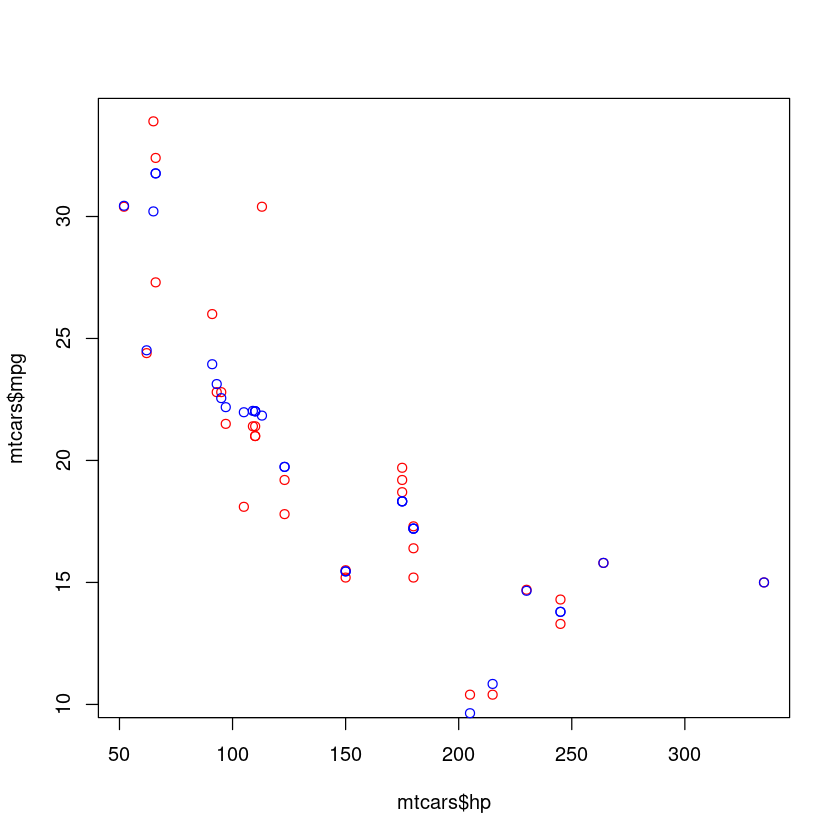

In [92]:
mpgx<- lm(mpg ~ poly(hp,12),mtcars)
plot(mtcars$hp,mtcars$mpg,col="red")
#lines(mtcars$hp,fitted(mpgx),col="blue") - to be line we need to sort the data
points(mtcars$hp,fitted(mpgx),col="blue")
sad=sum(abs(mtcars$mpg-fitted(mpgx)))
print(sad)

In [93]:
sample.int(22,7)

[1]  9  4  8 18  3 13 11

In [94]:
train<-mtcars[sample(32,17),]
head(train)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


In [100]:
liz<- function(deg){
#mpgx<- lm(mpg ~ poly(hp,deg) + poly(wt,deg),train)
mpgx<- lm(mpg ~ poly(hp,deg),train)
plot(mtcars$hp,mtcars$mpg,col="red")
#lines(mtcars$hp,fitted(mpgx),col="blue") - to be line we need to sort the data
points(mtcars$hp,predict(mpgx,mtcars),col="blue")
sad=sum(abs(mtcars$mpg-fitted(mpgx)))
print(sad)
}

Warning message in mtcars$mpg - fitted(mpgx):
“longer object length is not a multiple of shorter object length”

[1] 185.3805


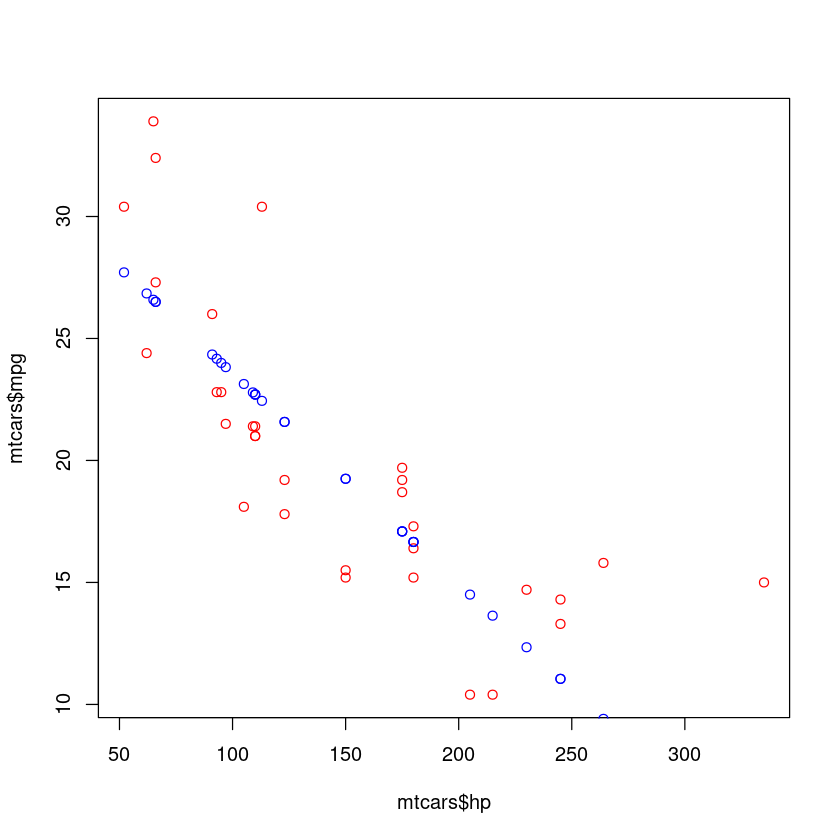

In [101]:
liz(1)

In [109]:
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284
